## Keras and Tensorflow

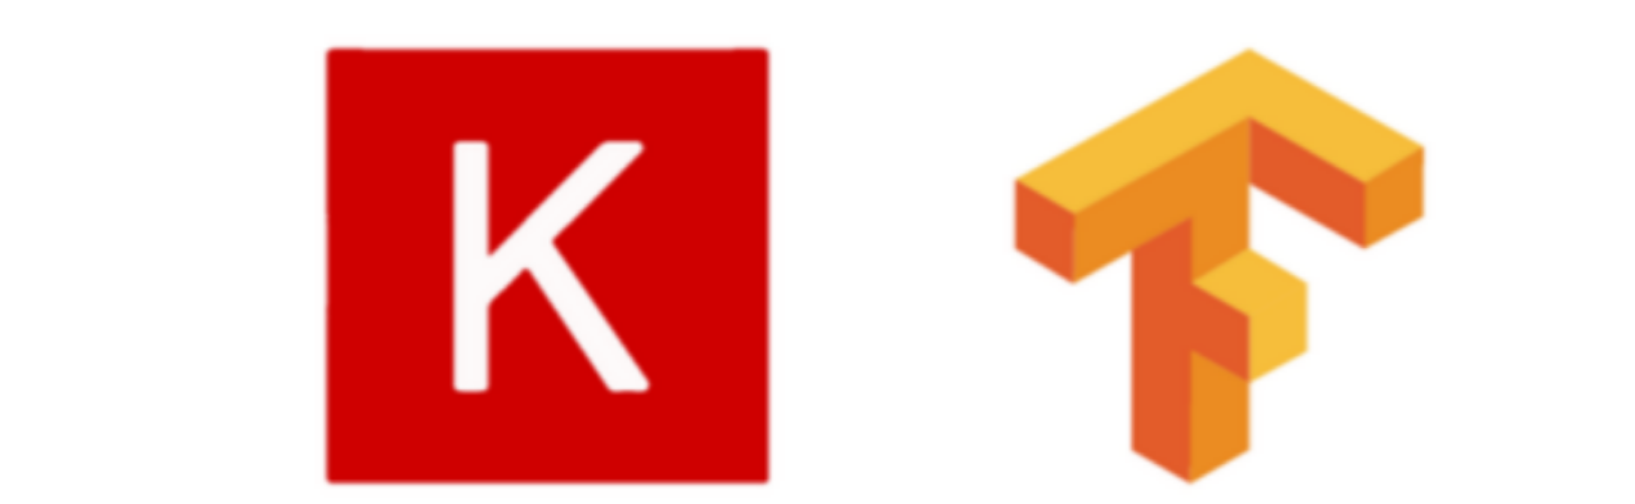

About Keras

Keras is a deep learning API written in Python, running on top of the machine learning platform TensorFlow. 
It was developed with a focus on enabling fast experimentation. Being able to go from idea to result as fast as possible is key to doing good research.

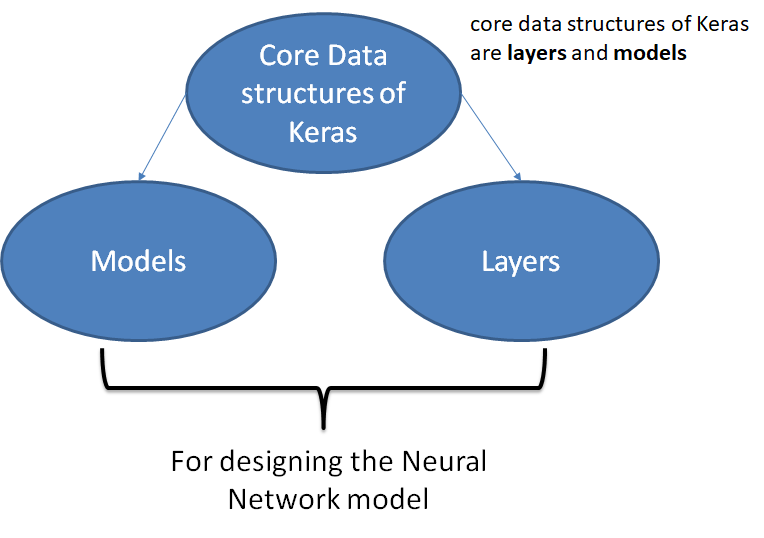

## Different ways to build Keras models

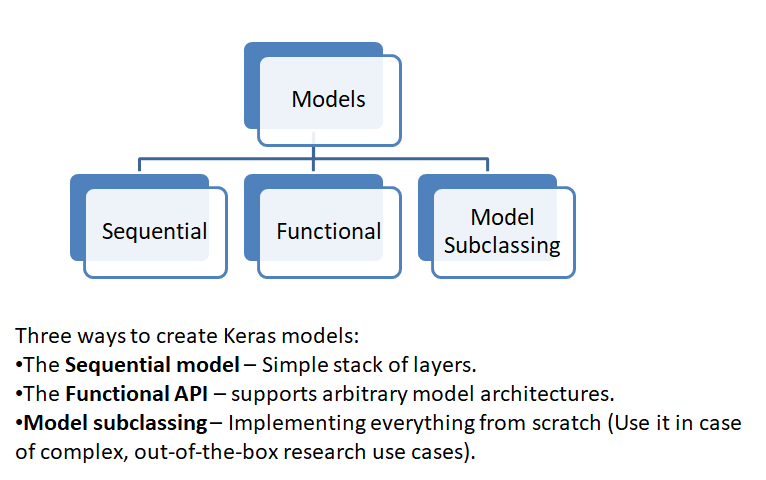

# The Sequential model

## Import useful libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

### Sequential model - is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [2]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, activation = "sigmoid",name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
print(x)
y = model(x)
print(y)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.37069267 0.7334502  0.76897174 0.67182916]
 [0.37069267 0.7334502  0.76897174 0.67182916]
 [0.37069267 0.7334502  0.76897174 0.67182916]], shape=(3, 4), dtype=float32)


is equivalent to this function:

In [3]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="sigmoid", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

### Creating a Sequential model
by passing a list of layers

In [4]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

Its layers are accessible via the layers attribute:

In [5]:
model.layers

### add and pop methods for adding and deleting the layers

Creating a Sequential model incrementally via the add() method

In [6]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="sigmoid"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

 We can check the number of layers in a NN model throgh len

In [7]:
print(len(model.layers))

3


pop() method removes the layers: a Sequential model behaves very much like a list of layers.

In [8]:
model.pop()
print(len(model.layers))  # 2

2


We can also give specific names to the models and the layers.

In [9]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="sigmoid", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

# Specifying the input shape in advance
Generally, all layers in Keras need to know the shape of their inputs in order to be able to create their weights. So when you create a layer like this, initially, it has no weights:

### The usual basic libraries

In [10]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization 
from keras.utils import np_utils

### 1. Importing the Iris dataset.

In [12]:
##data = pd.read_csv("C:\\Users\\user\\Downloads\\Iris_1.csv")
data = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [13]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Using the apply function, for every column, we find the total amount of NULL/NA values
data.apply(lambda x: sum(x.isnull()))

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 2. Splitting the given data into the input(x) and output data(y).

In [15]:
data.iloc[:,1:5]
x = data.iloc[:,1:5].values
y = data.iloc[:,5]
y = data.iloc[:,5].values

### 3. label encoding to transform the objects of output data into numerical values.

In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 4. Creating the sequential model 

In [17]:
model = Sequential() 
# API=Application Programming Interface
# Input_dim = 4 for the 4 features of a single sample.

# mention the number of neurons in 1st hidden layer (=8 in this case)
model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 

# Second dense layer has 4 neurons
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))

# Third dense layer has 3 neurons. 
model.add(Dense(3,name= 'Third_layer', activation="softmax")) ### for multiclass problems use softmax

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 8)                 40        
                                                                 
 Second_Hidden_layer (Dense)  (None, 4)                36        
                                                                 
 Third_layer (Dense)         (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


## Undersanding the Summary

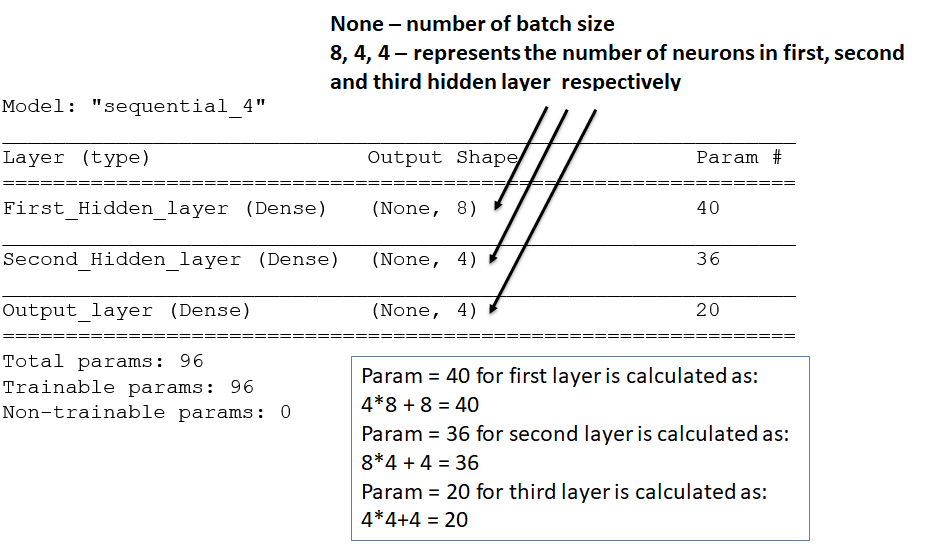

### Dense layer:  fully connected layer in a neural network.

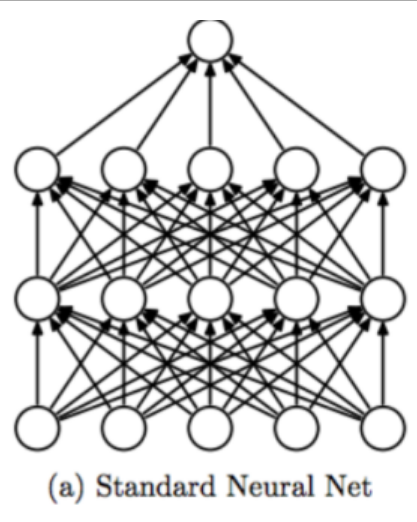

### Output Shape: (None,  8)
None here represents batch size and 8 represents number of neurons in hidden layer.

### Param #: 
This column shows the number of parameters that are trained for each layer.

### Trainable params:
Trainable parameters are the number of trainable elements in the network; neurons that are affected by backpropagation. For example, for the Wx + b operation in each neuron, W and b are trainable.

### Non Trainable params:
non-trainable parameters of a model are those that are not updated and optimized during training, and that have to be defined a priori, or passed as inputs.

## Visualizing the NN structures

### visulizing the structure through utils

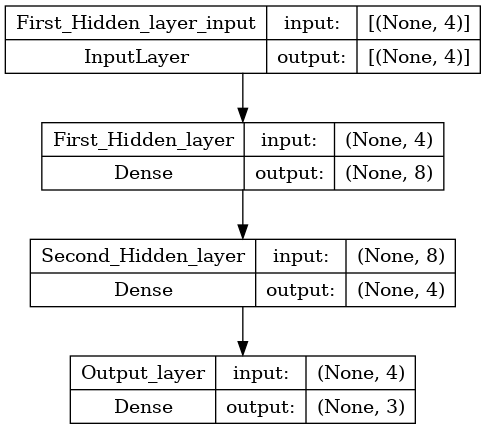

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
model = Sequential() 
# API=Application Programming Interface
# Input_dim = 4 for the 4 features of a single sample.

# First dense layer has 4 input nodes and 8 output nodes
model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 
# Second dense has 8 input nodes and 4 output nodes
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))
# Third dense layer has 4 input layer and 3 output node. This is the final output layer to show the result for binary classification. 
model.add(Dense(3,name= 'Output_layer', activation="softmax"))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Visualizing the ANN Model through graphviz
### To work on graphviz, complete the following steps:
### pip/ conda install graphviz ----> Download Graphviz through google ---->mention the path where graphviz is stored

In [19]:
!pip install ann_visualizer

  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4169 sha256=cbadc692a3708e82115d008919a458d8f4d2121e60e17d6e1012f857179a27e2
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [20]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

import keras;
from keras.models import Sequential;
from keras.layers import Dense;

network = Sequential();
        #Hidden Layer#1
network.add(Dense(units=8,
                  activation='relu',
                  input_dim=4))

        #Hidden Layer#2
network.add(Dense(units=4,
                  activation='relu'))
        #Exit Layer
network.add(Dense(units=3,activation='softmax'))


#from ann_visualizer.visualize import ann_viz;
#ann_viz(network, title="plotted with graphviz");

### your output will be stored as a pdf file

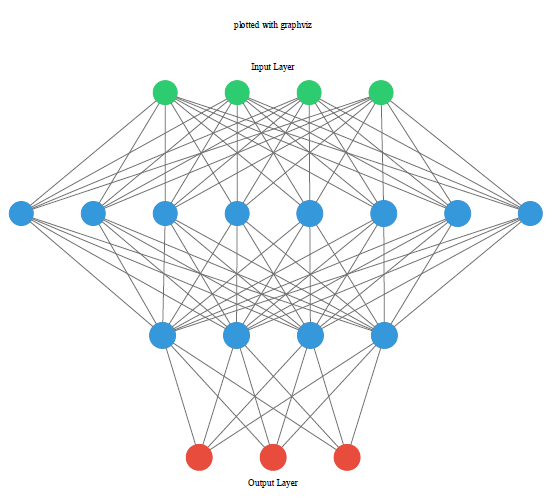

## Dense layer:  
it is a fully connected layer in a neuronal network.
##  Dropout layer: 
It ignores a set of neurons (randomly) see in the picture below. This is used to prevent the network from overfitting.

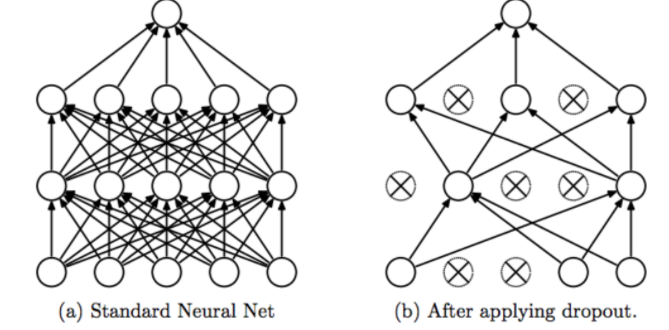

## The dropout layer
* It ignores a set of neurons (randomly) as per the parameter settings. 
* A dropout rate of 20% (or 0.2) implies that 20% o the neurons of a given layer will be ignored at random
**Dropouts may prevent the network from overfitting**

In [21]:
from keras.layers import Dense,Dropout 
model = Sequential() 
# Input_dim = 4 for the 4 features of a single sample.
# First dense layer has 4 input nodes and 8 output nodes

model.add(Dense(8, name= 'First_Hidden_layer', input_dim=4, activation="relu")) 
# Second dense has 8 input nodes and 4 output nodes
model.add(Dense(4,name= 'Second_Hidden_layer', activation="relu"))
model.add(Dropout(0.2))
# Third dense layer has 4 input lnodes and 3 output node. This is the final output layer to show the result for binary classification. 
model.add(Dense(3,name= 'Output_layer', activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_Hidden_layer (Dense)  (None, 8)                 40        
                                                                 
 Second_Hidden_layer (Dense)  (None, 4)                36        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 Output_layer (Dense)        (None, 3)                 15        
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

### Additionally


### Layer weight initializers - Usage of initializers

Initializers define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers depends on the layer. Usually, it is simply kernel_initializer and bias_initializer:


In [23]:
from tensorflow.keras import layers
from tensorflow.keras import initializers
layer = layers.Dense(
    units=64,
    kernel_initializer=initializers.RandomNormal(stddev=0.01),
    bias_initializer=initializers.Zeros()
)

In [24]:
#### All built-in initializers can also be passed via their string identifier:

layer = layers.Dense(
    units=64,
    kernel_initializer='random_normal',
    bias_initializer='zeros'
)

### Available initializers

    The following built-in initializers are available as part of the tf.keras.initializers module:
    RandomNormal class

In [25]:
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)

https://keras.io/api/layers/initializers/

#### Keras and Tensorflow
    Keras is a neural network library while TensorFlow is the open-source library for a number of various tasks in 
    machine learning. 
    TensorFlow provides both high-level and low-level APIs while Keras provides only high-level APIs. 
    Keras is built in Python which makes it way more user-friendly than TensorFlow

#### Difference between using import keras and import tensorflow.keras
    tensorflow.keras imports use TensorFlow repository code, whereas keras imports use Keras repository code. 
    The two use independent method/class implementations, even if keras imports from tensorflow.
    tensorflow.keras is recommended per being better maintaned and more up-to-date - unless you use TF <2, where the two are at par for most part

## Keras layers API
    Layers are the basic building blocks of neural networks in Keras. 
    A layer consists of a tensor-in tensor-out computation function (the layer's call method) and some state, held in TensorFlow variables (the layer's weights).

**A Layer instance is callable, much like a function**

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
layer = layers.Dense(32, activation='relu')
inputs = tf.random.uniform(shape=(10, 20))
outputs = layer(inputs)

"""Unlike a function, though, layers maintain a state, 
updated when the layer receives data during training, and stored in layer.weights:"""

print(layer.weights)

[<tf.Variable 'dense_11/kernel:0' shape=(20, 32) dtype=float32, numpy=
array([[-0.07793415, -0.1614936 ,  0.17733115,  0.19569391,  0.3197869 ,
         0.27508032, -0.09587464, -0.16131212,  0.12379581,  0.11447075,
         0.31370288,  0.24046874,  0.30181038, -0.08234072,  0.3366785 ,
         0.02447274, -0.21116336,  0.28113276, -0.0335767 , -0.0586932 ,
        -0.06674638, -0.00801671, -0.16719183, -0.02567476, -0.02321753,
         0.14518028,  0.08604398, -0.273669  ,  0.16241288,  0.2501228 ,
        -0.31190813, -0.13601127],
       [-0.02297345, -0.06069902,  0.1021018 ,  0.1296232 , -0.14781056,
        -0.10394773, -0.13067749, -0.32187355,  0.15439278, -0.16495134,
        -0.30391943, -0.09372444, -0.01999465,  0.02548331,  0.28110975,
         0.01591405, -0.28238335, -0.14750849, -0.16115953, -0.2908318 ,
         0.18593824,  0.04961216, -0.32803446,  0.14141172,  0.06490329,
         0.06320912, -0.06562811, -0.18124199,  0.06615412,  0.28756434,
        -0.0136095

#### Reference: https://keras.io/guides/sequential_model/

### Softmax function
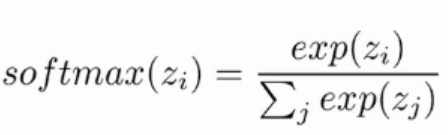

## Selection of Loss functions 
#### Binary Classification  - binary cross entropy
#### Multclass Classification - 
    categorical cross entropy - The labels are given in an one_hot format
    Sparse Categorical Crossentropy - when there are two or more classes and  the labels are integers, the 
                                      SparseCategoricalCrossentropy should be used. 

## Selection of Activation Functions

### For Hidden Layers
    Multilayer Perceptron (MLP): ReLU activation function.
    Convolutional Neural Network (CNN): ReLU activation function.
    Recurrent Neural Network: Tanh and/or Sigmoid activation function.
### For Output Layers:
    Binary Classification: One node, sigmoid activation.
    Multiclass Classification: One node per class, softmax activation.

### 